### Set dependancies

In [101]:
%reset -f

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

tf.keras.backend.clear_session()

import numpy as np
from numpy.random import randint

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

import matplotlib.pyplot as plt

import pandas

import os

print(tf.__version__)

2.2.0


### Read npz

In [102]:
with np.load('vetdata.npz') as data:
    train_images = np.array(data['x_train'])
    train_labels = np.int_(data['y_train'])
    test_images = np.array(data['x_test'])
    test_labels = np.int_(data['y_test'])

test_labels.astype(int)
train_labels.astype(int)

lst = data.files
for item in lst:
    print(item)

x_train
x_test
y_train
y_test


In [103]:
class_names = ['Unknown', 'Mycoses', 'Parasites', 'Allergies', 'Autoimmune', 'Tumors', 'Hormonal', 'Viral', 'Bacterial']

### Check data

In [104]:
train_images.shape

(1006, 200, 200, 3)

In [105]:
len(train_labels)

1006

In [106]:
test_images.shape

(1006, 200, 200, 3)

In [107]:
len(test_labels)

1006

In [108]:
values = randint(0, len(train_labels)-1, 25)
values

array([586, 953, 722, 275, 299, 960, 791, 192, 821, 733, 987,  56, 873,
       885, 952, 258,  65,  53, 130, 434,  91, 978, 687, 544, 161])

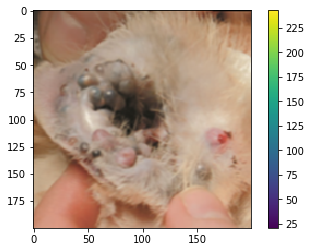

In [109]:
plt.figure()
plt.imshow(train_images[values[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [110]:
train_images = train_images / 255.0

test_images = test_images / 255.0

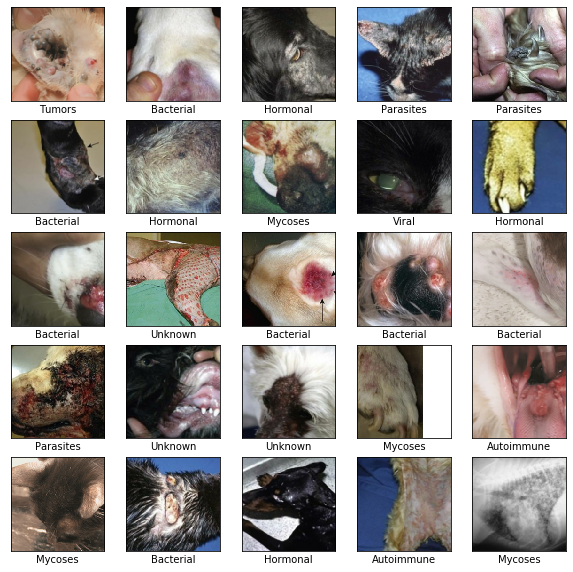

In [111]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[values[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[values[i]]])
plt.show()

### Set up model

There are 3 variants of the model. Seems like it works best with a simplified, yet deep model.

In [13]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(200, 200)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])

In [14]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class and 1 for the other
#     tf.keras.layers.Dense(9, activation='sigmoid')
# ])

In [112]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(200, 200 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9)
])

### Compile the model

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [113]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

### Train the model

In [115]:
training_history=model.fit(train_images, train_labels, epochs=14)

Epoch 1/14
32/32 [==============================] - 27s 852ms/step - loss: 2.8272 - accuracy: 0.1750
Epoch 2/14
32/32 [==============================] - 27s 848ms/step - loss: 2.0811 - accuracy: 0.1928
Epoch 3/14
32/32 [==============================] - 27s 836ms/step - loss: 2.0411 - accuracy: 0.2207
Epoch 4/14
32/32 [==============================] - 26s 824ms/step - loss: 1.8986 - accuracy: 0.2922
Epoch 5/14
32/32 [==============================] - 26s 825ms/step - loss: 1.5667 - accuracy: 0.4622
Epoch 6/14
32/32 [==============================] - 27s 836ms/step - loss: 1.1052 - accuracy: 0.6292
Epoch 7/14
32/32 [==============================] - 26s 824ms/step - loss: 0.7791 - accuracy: 0.7505
Epoch 8/14
32/32 [==============================] - 26s 821ms/step - loss: 0.5676 - accuracy: 0.8241
Epoch 9/14
32/32 [==============================] - 26s 822ms/step - loss: 0.5138 - accuracy: 0.8489
Epoch 10/14
32/32 [==============================] - 27s 839ms/step - loss: 0.4178 - accura

### Evaluate accuracy

In [116]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 6s - loss: 0.1220 - accuracy: 0.9811

Test accuracy: 0.9811133146286011


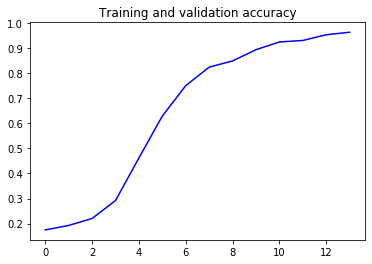

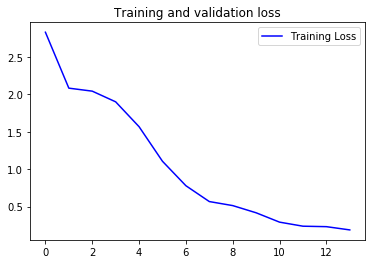

In [117]:
acc = training_history.history['accuracy']
loss = training_history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Make predictions
Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [25]:
predictions_nonorm = model.predict(test_images)

In [26]:
predictions_nonorm[252]

array([0.599, 2.928, 5.775, -1.353, 2.660, -1.291, -4.652, -0.703, 0.074],
      dtype=float32)

In [27]:
norm_model = tf.keras.Sequential([model, tf.keras.layers.LayerNormalization()])

In [28]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 9)                 20508713  
_________________________________________________________________
layer_normalization (LayerNo (None, 9)                 18        
Total params: 20,508,731
Trainable params: 20,508,731
Non-trainable params: 0
_________________________________________________________________


In [29]:
predictions_norm = norm_model.predict(test_images)

In [30]:
predictions_norm[252]

array([0.053, 0.870, 1.868, -0.632, 0.776, -0.610, -1.789, -0.404, -0.131],
      dtype=float32)

In [31]:
probability_norm_model = tf.keras.Sequential([norm_model, tf.keras.layers.Softmax()])

In [32]:
probability_norm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 9)                 20508731  
_________________________________________________________________
softmax (Softmax)            (None, 9)                 0         
Total params: 20,508,731
Trainable params: 20,508,731
Non-trainable params: 0
_________________________________________________________________


In [33]:
predictions_soft = probability_norm_model.predict(test_images)

In [34]:
predictions_soft[252]

array([0.071, 0.160, 0.435, 0.036, 0.146, 0.037, 0.011, 0.045, 0.059],
      dtype=float32)

In [118]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [119]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 9)                 20508713  
_________________________________________________________________
softmax (Softmax)            (None, 9)                 0         
Total params: 20,508,713
Trainable params: 20,508,713
Non-trainable params: 0
_________________________________________________________________


In [120]:
predictions = probability_model.predict(test_images)

In [122]:
predictions[600]

array([0.000, 0.000, 0.000, 0.000, 0.000, 0.997, 0.000, 0.000, 0.003],
      dtype=float32)

In [250]:
zzz=predictions.max(axis=1)
zzz

array([0.790, 0.175, 0.163, ..., 0.911, 0.524, 0.904], dtype=float32)

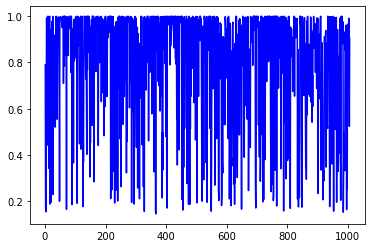

In [242]:
plt.plot(np.arange(1,1007,1),zzz,'b')

In [247]:
np.argmax(zzz)

False

In [243]:
input=predictions[55]
input

array([0.989, 0.007, 0.000, 0.000, 0.001, 0.000, 0.000, 0.000, 0.001],
      dtype=float32)

In [186]:
def buffosy(input):
    if max(input)==1.0 or max(input)<0.5:
        output=[0.992, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
        return(output)

In [187]:
zzz=buffosy(input)
zzz

In [172]:
probability_buffo_model = tf.keras.Sequential([model, Lambda(buffosy)])

TypeError: You are attempting to use Python control flow in a layer that was not declared to be dynamic. Pass `dynamic=True` to the class constructor.
Encountered error:
"""
iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.
"""

In [112]:
probability_buffo_model.summary()

NameError: name 'probability_buffo_model' is not defined

In [129]:
predictions = probability_model.predict(test_images)

In [ ]:
values=randint(0, len(test_labels)-1,100)
predictions[values]

In [131]:
np.argmax(predictions[252])

2

In [123]:
files = []

with open('files.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentItem = line[:-1]

        # add item to the list
        files.append(currentItem)

print(files)

['./data/validation/A\\valid0.png', './data/validation/A\\valid1.png', './data/validation/A\\valid10.png', './data/validation/A\\valid11.png', './data/validation/A\\valid12.png', './data/validation/A\\valid13.png', './data/validation/A\\valid14.png', './data/validation/A\\valid15.png', './data/validation/A\\valid16.png', './data/validation/A\\valid17.png', './data/validation/A\\valid18.png', './data/validation/A\\valid19.png', './data/validation/A\\valid2.png', './data/validation/A\\valid20.png', './data/validation/A\\valid21.png', './data/validation/A\\valid22.png', './data/validation/A\\valid23.png', './data/validation/A\\valid24.png', './data/validation/A\\valid25.png', './data/validation/A\\valid26.png', './data/validation/A\\valid27.png', './data/validation/A\\valid28.png', './data/validation/A\\valid3.png', './data/validation/A\\valid4.png', './data/validation/A\\valid5.png', './data/validation/A\\valid6.png', './data/validation/A\\valid7.png', './data/validation/A\\valid8.png', 

In [124]:
max_pred=np.amax(predictions, axis=1)
index_good=np.argwhere(max_pred > 0.9)
index_good=index_good.ravel()
index_sample=np.random.choice(index_good, 100)
index_sample

array([ 700,  782,   31,  720,  100,  768,  870,  399,  290,   19,  546,
        313,  704,   92,  132,  895,  241,  669,  236,  103,  320,  117,
        614,  997,    4,  129,  422,  381,  213,  284,  959,  432,  649,
        153,  415,  791,  765,  331,   13,  729,   15,  735,  103,   99,
        762,  817,  864,  409,  199,  224,   91,  162,  337,  808,  867,
        801,   53,   73,  331,  428,  784,  768,  233,  611,  121,  769,
        397,  938,  666, 1001,  924,  784,  597,  193,  377,  985,  564,
        887,  606,  840,  426,  642,   82,  425,  225,  850,  397,  314,
        243,  616,  139,  992,  543,  167,  963,  609, 1004,  739,  880,
         62], dtype=int64)

In [125]:
files_sel=np.take(files,index_sample)
predictions_sel=np.take(predictions,index_sample, axis=0)

IndexError: index 700 is out of bounds for axis 0 with size 305

In [126]:
import pandas
d = {'images': files_sel, 'Unknown':predictions_sel[:,0], 'Mycoses':predictions_sel[:,1], 'Parasites':predictions_sel[:,2], 'Allergies':predictions_sel[:,3], 'Autoimmune':predictions_sel[:,4], 'Tumors':predictions_sel[:,5], 'Hormonal':predictions_sel[:,6], 'Viral':predictions_sel[:,7], 'Bacterial':predictions_sel[:,8]}
df1=pandas.DataFrame(data=d).round(3)

NameError: name 'files_sel' is not defined

In [100]:
df1.to_excel("output.xlsx")

In [132]:
test_labels[252]

2

In [127]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(9))
    plt.yticks([])
    thisplot = plt.bar(range(9), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

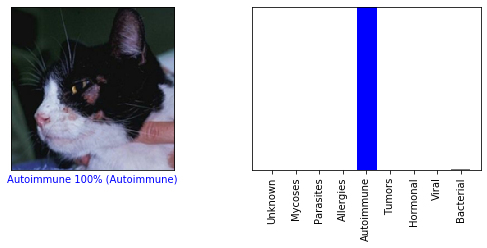

,Class,Prediction
0,Unknown,0.000
1,Mycoses,0.000
2,Parasites,0.000
3,Allergies,0.000
4,Autoimmune,0.997
5,Tumors,0.000
6,Hormonal,0.000
7,Viral,0.000
8,Bacterial,0.003


In [128]:
i = randint(0, len(test_labels)-1)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
_ = plt.xticks(range(9), class_names, rotation=90)
plt.show()

import pandas
d = {'Class': class_names, 'Prediction': predictions[i]}
pandas.DataFrame(data=d).round(3)

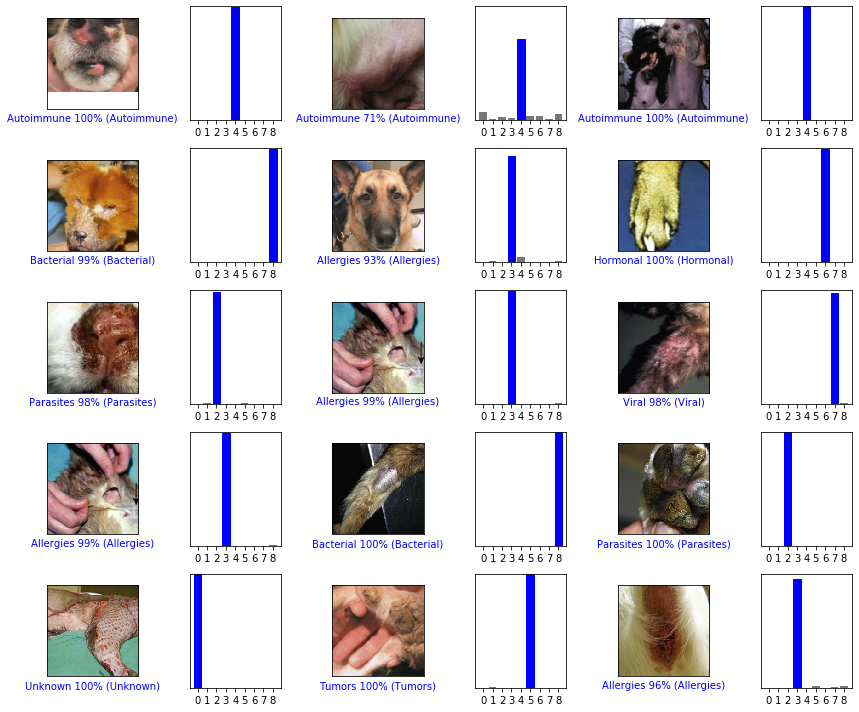

In [129]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
values=randint(0, len(test_labels)-1,num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(values[i], predictions[values[i]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(values[i], predictions[values[i]], test_labels)
plt.tight_layout()
plt.show()

In [130]:
import os
import cv2
import glob

IMG_HEIGHT=200
IMG_WIDTH=200

def im2npa(imagedir, subdirs, show):
# create numpy array from directory of images
# inputs:
# imagedir - directory with the images
# subdirs - list of subdirs (classes)
# show - if=1, plot files and file names
# outputs:
# data - numpy array variable with all images as tensor
    data = []
    for i in range(len(subdirs)):
        pathis=os.path.join(imagedir, subdirs[i],"*.*")
        files = glob.glob(pathis)
        for myFile in files:
            image = cv2.imread (myFile, cv2.IMREAD_UNCHANGED)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
            data.append (image)
            if show==1:
                print(myFile)
                imgplot = plt.imshow(image)
                plt.show()
    
    data=np.asarray(data)
    print('Data shape:', data.shape)
    return data

In [131]:
x_valid=im2npa('./data/random/', ['z'],0)

Data shape: (0,)


In [132]:
valid_labels=np.zeros((len(x_valid),), dtype=int)

In [133]:
predictions = probability_model.predict(x_valid)

UnboundLocalError: local variable 'batch_outputs' referenced before assignment

In [134]:
for i in range(len(predictions)):
    predictions[i]=buffosy(predictions[i])
    

NameError: name 'buffosy' is not defined

In [135]:
i = randint(0, len(x_valid)-1)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], valid_labels, x_valid)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  valid_labels)
_ = plt.xticks(range(9), class_names, rotation=90)
plt.show()

import pandas
d = {'Class': class_names, 'Prediction': predictions[i]}
pandas.DataFrame(data=d).round(3)

ValueError: low >= high

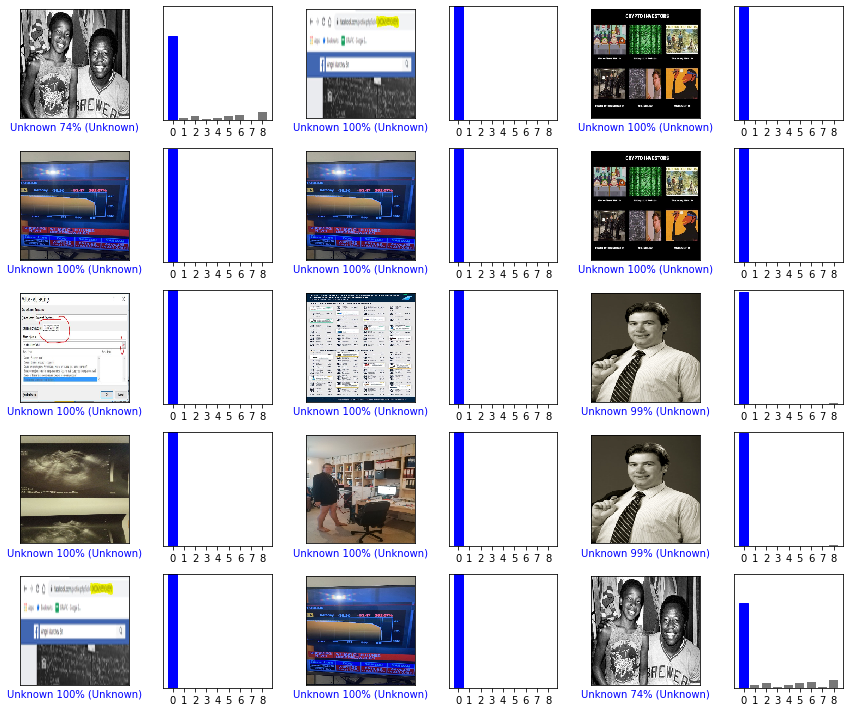

In [125]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
values=randint(0, len(x_valid)-1,num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(values[i], predictions[values[i]], valid_labels, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(values[i], predictions[values[i]], valid_labels)
plt.tight_layout()
plt.show()

### Export the trained model

In [58]:
# Save the entire model as a SavedModel.
os.chdir("C:/Users/Junior/anaconda_projects/image_classification/aisolvers/")
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')
probability_model.save('saved_model/vetmodel/', include_optimizer=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/vetmodel/assets


In [33]:
# to converto to tensorflowjs execute the following in bash/powershell
tensorflowjs_converter --input_format=tf_saved_model --output_node_names='web_model/vetmodel' --saved_model_tags=serve C:/Users/Junior/anaconda_projects/image_classification/aisolvers/saved_model/vetmodel/ C:/Users/Junior/anaconda_projects/image_classification/aisolvers/production/model

INFO:tensorflow:Assets written to: saved_model/vetmodel/assets


C:\Users\Junior\AppData\Roaming\Python\Python37\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [5]:

probability_model = load_model('saved_model/vetmodel/')